In [3]:
install.packages(c("ggplot2", "dplyr", "lubridate", "forecast", "readr", "tseries", "Rcpp"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:

set.seed(42)  # for reproducibility

# Create 90 days of data
Date <- seq(as.Date("2024-01-01"), by = "day", length.out = 90)

# Generate realistic values
Temperature <- round(rnorm(90, mean = 28, sd = 2.5), 1)  # °C
Humidity <- round(rnorm(90, mean = 65, sd = 8), 1)       # %
Rainfall <- round(sample(c(0, 0, 0, 1, 3, 5, 8, 10), 90, replace = TRUE, prob = c(0.6,0.1,0.1,0.1,0.05,0.025,0.015,0.01)), 1)

# Combine into a data frame
weather <- data.frame(Date, Temperature, Humidity, Rainfall)

# Preview the dataset
head(weather)

# Optional: save to CSV if you want to keep it for later
# write.csv(weather, "weather.csv", row.names = FALSE)


,Date,Temperature,Humidity,Rainfall
,<date>,<dbl>,<dbl>,<dbl>
1,2024-01-01,31.4,76.1,0
2,2024-01-02,26.6,61.2,0
3,2024-01-03,28.9,70.2,0
4,2024-01-04,29.6,76.1,8
5,2024-01-05,29.0,56.1,0
6,2024-01-06,27.7,58.1,0


In [10]:
library(ggplot2)
library(dplyr)
library(lubridate)
library(forecast)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


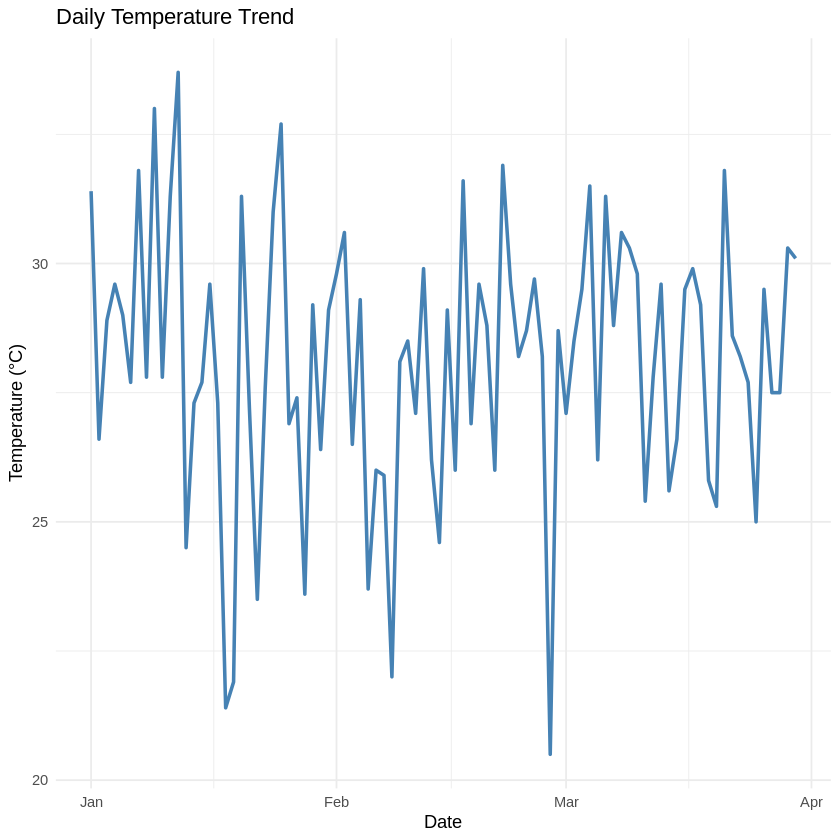

In [11]:
ggplot(weather, aes(x = Date, y = Temperature)) +
  geom_line(color = "steelblue", size = 1) +
  labs(title = "Daily Temperature Trend", x = "Date", y = "Temperature (°C)") +
  theme_minimal()

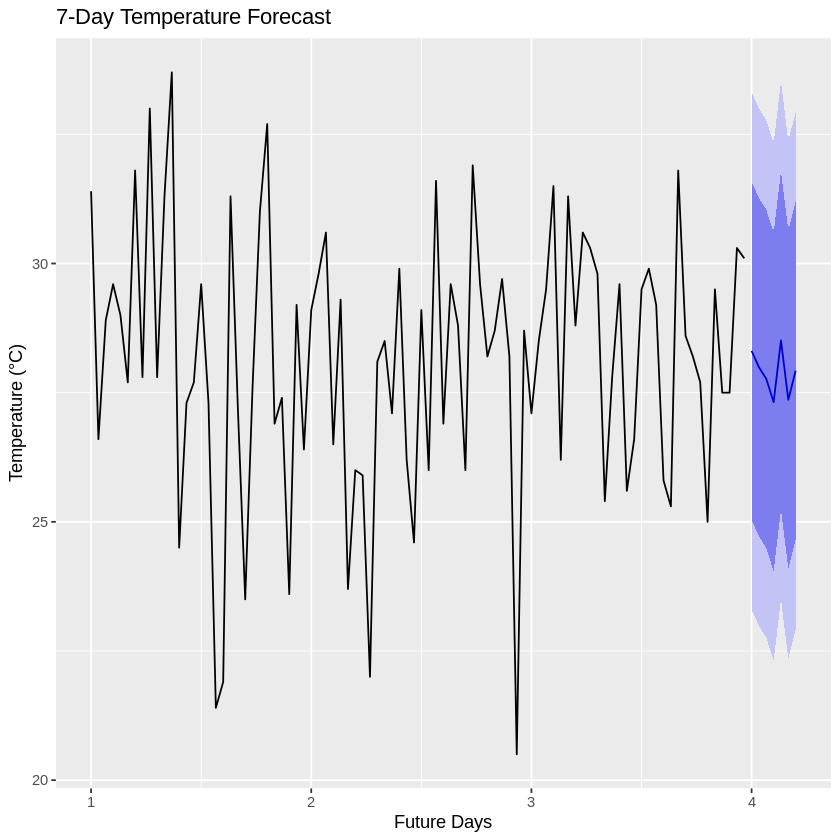

In [12]:
temp_ts <- ts(weather$Temperature, frequency = 30)
model <- auto.arima(temp_ts)
forecast_temp <- forecast(model, h = 7)

autoplot(forecast_temp) +
  labs(title = "7-Day Temperature Forecast", y = "Temperature (°C)", x = "Future Days")
